# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [74]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [4]:
employees = pd.read_csv(r'/Users/nadimsaad/Desktop/IRONHACK/Module 2/Week 4/Day 18/Employee.csv')

In [7]:
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [11]:
# Method 1
employees.groupby(['Department'])['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [12]:
# Method 2
employees.groupby(['Department'])['Salary'].agg(['mean'])

,mean
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [19]:
employees.pivot_table(index=["Department","Title"], values=["Salary"])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [20]:
employees.pivot_table(index=["Title"], columns=["Years"], values=['Salary'], fill_value=0)

Salary                    
Years          1   2   3   4   7   8
Title                               
VP             0   0   0   0   0  70
analyst       35  30   0  35   0   0
associate      0  55  55   0  60   0

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [25]:
employees.pivot_table(index=["Department","Title"], values=['Salary'],aggfunc=['mean','count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [29]:
employees.pivot_table(index=["Department","Title"], values=['Salary'],aggfunc=['median','min','max','std'],fill_value=0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [ ]:
"""
For each department and each job title where there is only 1 employee the standard deviation is zero 
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [30]:
employees.pivot_table(index=["Department","Title"], values=['Salary'],aggfunc=['median','min','max','std'],fill_value=0,dropna=False)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate    0.0      0      0  0.000000
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      VP           0.0      0      0  0.000000
           analyst      0.0      0      0  0.000000
           associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [32]:
employees.pivot_table(index=["Department"], values=['Salary'],aggfunc=['sum','count'])

,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [33]:
employees.pivot_table(index=["Department","Title"], values=['Years','Salary'],aggfunc={'Years':np.sum,'Salary':np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [34]:
fitbit=pd.read_csv(r'/Users/nadimsaad/Desktop/IRONHACK/Module 2/Week 4/Day 18/fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [35]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [36]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [37]:
fitbit[['Minutes Very Active','Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [38]:
import matplotlib.pyplot as plt;

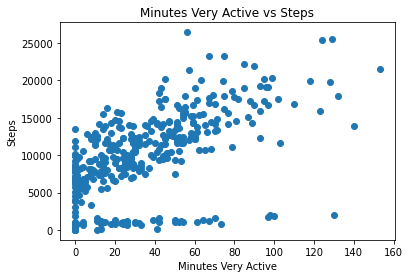

In [44]:
plt.scatter(x='Minutes Very Active', y='Steps', data=fitbit)
plt.title('Minutes Very Active vs Steps')
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
There is a moderate corrolation between the 2 (0.4 and 0.6)
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [41]:
fitbit[['Minutes Sedentary','Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

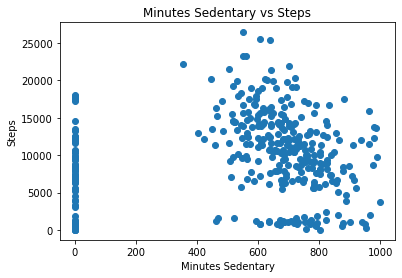

In [45]:
plt.scatter(x='Minutes Sedentary', y='Steps', data=fitbit)
plt.title('Minutes Sedentary vs Steps')
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

fitbit[['Minutes Sedentary','Steps']].corr()

In [ ]:
"""
There is very low correlation (<0.2). It's logical, a sedentary person is not moving thus no steps
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [46]:
fitbit[['MinutesOfSleep','Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

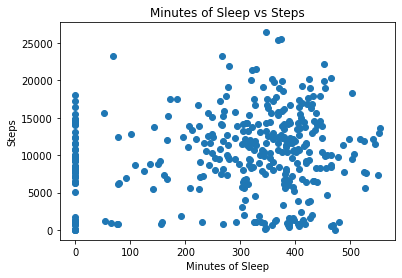

In [47]:
plt.scatter(x='MinutesOfSleep', y='Steps', data=fitbit)
plt.title('Minutes of Sleep vs Steps')
plt.xlabel("Minutes of Sleep")
plt.ylabel("Steps")
plt.show()

In [ ]:
"""
Here too, there is a very little correlation between the 2. The more a person sleeps, the less steps there are
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [48]:
cor_fit=fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']].corr()
cor_fit.sort_values("Steps",ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [60]:
sorted_fit = cor_fit.unstack().sort_values(ascending=False)
sorted_fit
# Steps correlations by desc order Minutes very Active, Floors, and by Calories burned

Calorie burned       Calorie burned         1.000000
Steps                Steps                  1.000000
Minutes Very Active  Minutes Very Active    1.000000
Minutes Sedentary    Minutes Sedentary      1.000000
Floors               Floors                 1.000000
MinutesOfSleep       MinutesOfSleep         1.000000
Steps                Minutes Very Active    0.571452
Minutes Very Active  Steps                  0.571452
Floors               Minutes Very Active    0.399503
Minutes Very Active  Floors                 0.399503
Steps                Floors                 0.306511
Floors               Steps                  0.306511
Steps                Calorie burned         0.255305
Calorie burned       Steps                  0.255305
Minutes Sedentary    MinutesOfSleep         0.204242
MinutesOfSleep       Minutes Sedentary      0.204242
Calorie burned       Minutes Very Active    0.197881
Minutes Very Active  Calorie burned         0.197881
Steps                MinutesOfSleep         0.

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [61]:
time_grades=pd.read_csv(r'/Users/nadimsaad/Desktop/IRONHACK/Module 2/Week 4/Day 18/time_grades.csv')

In [63]:
time_grades.describe()

,Study time,Grade
count,15.000000,15.000000
mean,9.000000,5.933333
std,5.182388,2.711527
min,2.000000,1.000000
25%,5.500000,3.500000
50%,8.000000,7.000000
75%,11.500000,8.000000
max,20.000000,9.000000


#### Show visually the frequency distribution of the `time_grades` dataset.

<AxesSubplot:xlabel='Study time', ylabel='Frequency'>

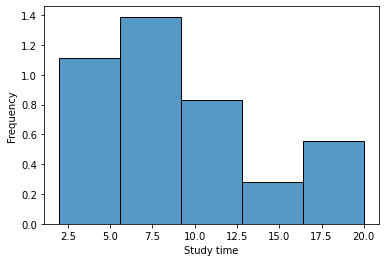

In [69]:
sns.histplot(data=time_grades,x='Study time',stat='frequency')

<AxesSubplot:xlabel='Grade', ylabel='Frequency'>

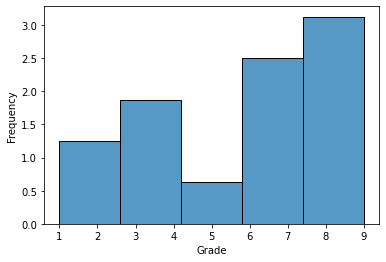

In [68]:
sns.histplot(data=time_grades,x='Grade',stat='frequency')

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [70]:
time_grades[['Study time','Grade']].corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [71]:
time_grades[['Study time','Grade']].corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
"""
There is a strong correlation between the 2. It is stronger in the spearman method because this method
is based on ranked values 
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

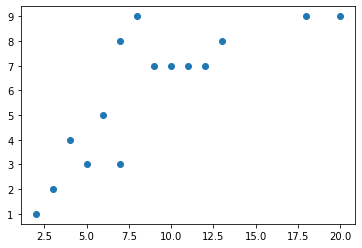

In [77]:
x=np.array(time_grades['Study time'])
y=np.array(time_grades['Grade'])
plt.pyplot.scatter(x, y)

In [ ]:
"""

"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
Spearman correlation measures relationships between variables that are not necessarily linear. 
We are only looking at whether the data is moving in the same or the opposite direction.
One is based on the ranked values whereas Pearson's is a linear relationship between variables and
sensitive to outliers and scattered data such in here.

"""